ИУ5-62Б Хизриев Адам Альбертович

Рубежный контроль №2 

Задание

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Набор данных

https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent

Методы

1)метод опорных векторов
2)случайный лес

Решение

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [37]:
data = pd.read_csv('houses_to_rent.csv', sep=',')

In [38]:
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [40]:
# Ищем пропуски.
(data.isnull() | data.empty | data.isna()).sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

Выбор метрик и подготовка данных
Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:

precision;
recall;
f1-score.
Всем метрикам был задан уровень детализации average='weighted'.

In [43]:
del data['floor']

In [44]:
del data['hoa']
del data['rent amount']
del data['total']
del data['fire insurance']
del data['property tax']

In [45]:
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,animal,furniture
0,0,1,240,3,3,4,acept,furnished
1,1,0,64,2,1,1,acept,not furnished
2,2,1,443,5,5,4,acept,furnished
3,3,1,73,2,2,1,acept,not furnished
4,4,1,19,1,1,0,not acept,not furnished
...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,acept,not furnished
6076,6076,1,84,2,2,1,not acept,furnished
6077,6077,0,48,1,1,0,acept,not furnished
6078,6078,1,160,3,2,2,not acept,not furnished


In [47]:

pd.get_dummies(data.furniture)

,furnished,not furnished
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
6075,0,1
6076,1,0
6077,0,1
6078,0,1


In [48]:
pd.get_dummies(data.animal)

,acept,not acept
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
6075,1,0
6076,0,1
6077,1,0
6078,0,1


In [49]:
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,animal,furniture
0,0,1,240,3,3,4,acept,furnished
1,1,0,64,2,1,1,acept,not furnished
2,2,1,443,5,5,4,acept,furnished
3,3,1,73,2,2,1,acept,not furnished
4,4,1,19,1,1,0,not acept,not furnished
...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,acept,not furnished
6076,6076,1,84,2,2,1,not acept,furnished
6077,6077,0,48,1,1,0,acept,not furnished
6078,6078,1,160,3,2,2,not acept,not furnished


In [56]:
pd.get_dummies(data, columns=["furniture", "animal"]).head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,furniture_furnished,furniture_not furnished,animal_acept,animal_not acept
0,0,1,240,3,3,4,1,0,1,0
1,1,0,64,2,1,1,0,1,1,0
2,2,1,443,5,5,4,1,0,1,0
3,3,1,73,2,2,1,0,1,1,0
4,4,1,19,1,1,0,0,1,0,1


In [63]:
data["animal"] = data["animal"].astype('category')
data["animal_cat"] = data["animal"].cat.codes

data["furniture"] = data["furniture"].astype('category')
data["furniture_cat"] = data["furniture"].cat.codes
data.head()

,Unnamed: 0.1,Unnamed: 0,city,area,rooms,bathroom,parking spaces,animal,furniture,animal_cat,furniture_cat
0,0,0,1,240,3,3,4,acept,furnished,0,0
1,1,1,0,64,2,1,1,acept,not furnished,0,1
2,2,2,1,443,5,5,4,acept,furnished,0,0
3,3,3,1,73,2,2,1,acept,not furnished,0,1
4,4,4,1,19,1,1,0,not acept,not furnished,1,1


In [64]:
del data['animal']
del data['furniture']

data.head()

,Unnamed: 0.1,Unnamed: 0,city,area,rooms,bathroom,parking spaces,animal_cat,furniture_cat
0,0,0,1,240,3,3,4,0,0
1,1,1,0,64,2,1,1,0,1
2,2,2,1,443,5,5,4,0,0
3,3,3,1,73,2,2,1,0,1
4,4,4,1,19,1,1,0,1,1


Выбор метрик и подготовка данных
Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:

precision;
recall;
f1-score.
Всем метрикам был задан уровень детализации average='weighted'.

In [65]:

def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues");

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['city'], axis=1), data['city'], test_size=0.5, random_state=17)

Масштабирование данных

In [67]:

scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,Unnamed: 0.1,Unnamed: 0,area,rooms,bathroom,parking spaces,animal_cat,furniture_cat
count,3.040000e+03,3.040000e+03,3.040000e+03,3.040000e+03,3040.000000,3.040000e+03,3.040000e+03,3.040000e+03
mean,-8.180591e-17,-8.180591e-17,-3.505967e-18,1.682864e-16,0.000000,-1.051790e-17,8.180591e-18,1.519253e-17
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165,1.000165e+00,1.000165e+00,1.000165e+00
min,-1.720834e+00,-1.720834e+00,-3.112574e-01,-1.333009e+00,-0.946566,-1.099376e+00,-5.438958e-01,-1.681879e+00
25%,-8.850340e-01,-8.850340e-01,-2.074570e-01,-4.439463e-01,-0.946566,-4.801239e-01,-5.438958e-01,-1.681879e+00
50%,8.309634e-03,8.309634e-03,-1.166317e-01,4.451161e-01,-0.249145,-4.801239e-01,-5.438958e-01,5.945733e-01
75%,8.749968e-01,8.749968e-01,9.961904e-02,4.451161e-01,0.448277,1.391280e-01,-5.438958e-01,5.945733e-01
max,1.708117e+00,1.708117e+00,5.287778e+01,4.890428e+00,5.330228,6.331646e+00,1.838587e+00,5.945733e-01


SVC
Базовая модель
Без масштабирования:

/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

weighted precision: 0.7450415512465375
weighted recall: 0.8631578947368421
weighted f1-score: 0.7997621171573001


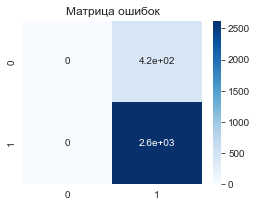

In [68]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print_metrics(y_test, y_pred_svm)

С масштабированием:

/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

weighted precision: 0.7450415512465375
weighted recall: 0.8631578947368421
weighted f1-score: 0.7997621171573001


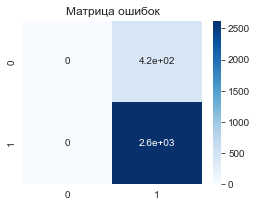

In [69]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

Подбор гиперпараметров

In [70]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 0.1}


Лучшая модель

/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

weighted precision: 0.7450415512465375
weighted recall: 0.8631578947368421
weighted f1-score: 0.7997621171573001


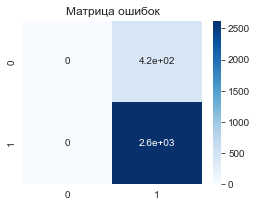

In [71]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

RandomForestClassifier
Базовая модель

weighted precision: 0.7871901215005812
weighted recall: 0.8457236842105263
weighted f1-score: 0.806609037995535


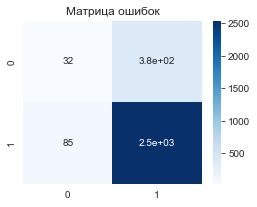

In [72]:

rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Подбор гиперпараметров

In [73]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 50}


Лучшая модель

weighted precision: 0.7869386497980266
weighted recall: 0.8519736842105263
weighted f1-score: 0.805811521284414


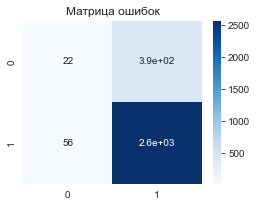

In [74]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Сравнение результатов

SVC result

weighted precision: 0.7450415512465375
weighted recall: 0.8631578947368421
weighted f1-score: 0.7997621171573001


/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina_vorontsova/PycharmProjects/RK2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

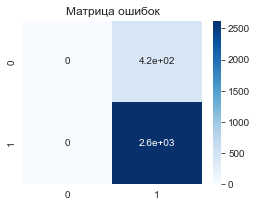

In [75]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.7869386497980266
weighted recall: 0.8519736842105263
weighted f1-score: 0.805811521284414


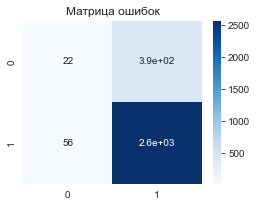

In [76]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)